In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
%matplotlib inline

In [3]:
oo = pd.read_csv('all_rankings.csv')
oo.head()

,year,PCT team,PCT,PPG team,PPG,OPPG team,OPPG,SPG team,SPG,APG team,...,FTP team,FTP,SCMG team,SCMG,RPI team,RPI,SOS team,SOS,ID team,ID
0,2017.0,Gonzaga,94.9,The Citadel,89.8,Virginia,56.4,West Virginia,10.0,UCLA,...,Notre Dame,80.0,Gonzaga,21.1,North Carolina,0.668,North Carolina,0.607,Abilene Christian,1101
1,2017.0,Villanova,88.9,UCLA,89.8,Saint Mary's,57.5,Portland St.,9.9,Purdue,...,Central Mich.,79.1,Wichita St.,18.6,Kentucky,0.658,Vanderbilt (19-16),0.606,Air Force,1102
2,2017.0,Arizona,86.5,Central Mich.,88.3,SMU,60.0,Fordham,9.8,Lipscomb,...,Villanova,79.0,West Virginia,14.8,Kansas,0.656,Louisville (25-9),0.604,Akron,1103
3,2017.0,Middle Tenn.,86.1,Purdue Fort Wayne,86.9,Saint Peter's,60.8,Eastern Mich.,9.6,North Carolina,...,Oklahoma St.,78.9,Saint Mary's,14.6,Villanova,0.655,Baylor (26-8),0.601,Alabama,1104
4,2017.0,UCLA,86.1,Oklahoma St.,85.7,Old Dominion,61.2,Holy Cross,9.4,Iowa,...,Mercer,78.2,Villanova,14.5,Arizona,0.652,Virginia (23-11),0.600,Alabama A&M,1105


In [4]:
oo = oo.fillna('no data')
oo = oo.set_index('year')
oo

,PCT team,PCT,PPG team,PPG,OPPG team,OPPG,SPG team,SPG,APG team,APG,FTP team,FTP,SCMG team,SCMG,RPI team,RPI,SOS team,SOS,ID team,ID
year,,,,,,,,,,,,,,,,,,,,
2017.0,Gonzaga,94.9,The Citadel,89.8,Virginia,56.4,West Virginia,10,UCLA,21.4,Notre Dame,80,Gonzaga,21.1,North Carolina,0.668,North Carolina,0.607,Abilene Christian,1101
2017.0,Villanova,88.9,UCLA,89.8,Saint Mary's,57.5,Portland St.,9.9,Purdue,18.3,Central Mich.,79.1,Wichita St.,18.6,Kentucky,0.658,Vanderbilt (19-16),0.606,Air Force,1102
2017.0,Arizona,86.5,Central Mich.,88.3,SMU,60,Fordham,9.8,Lipscomb,18.2,Villanova,79,West Virginia,14.8,Kansas,0.656,Louisville (25-9),0.604,Akron,1103
2017.0,Middle Tenn.,86.1,Purdue Fort Wayne,86.9,Saint Peter's,60.8,Eastern Mich.,9.6,North Carolina,18.1,Oklahoma St.,78.9,Saint Mary's,14.6,Villanova,0.655,Baylor (26-8),0.601,Alabama,1104
2017.0,UCLA,86.1,Oklahoma St.,85.7,Old Dominion,61.2,Holy Cross,9.4,Iowa,17.7,Mercer,78.2,Villanova,14.5,Arizona,0.652,Virginia (23-11),0.6,Alabama A&M,1105
2017.0,Wichita St.,86.1,Savannah St.,85.7,UCF,61.2,A&M-Corpus Christi,9.4,Canisius,17.7,Marquette,78.1,UCLA,14.3,Gonzaga,0.649,Kentucky (32-6),0.598,Alabama St.,1106
2017.0,Kansas,86.1,Marshall,85.6,Illinois St.,61.3,The Citadel,9.3,William & Mary,17.5,Wofford,78,SMU,14.3,Oregon,0.648,Florida (27-9),0.598,Albany (NY),1107
2017.0,SMU,85.7,Portland St.,85.3,Cincinnati,61.3,UNC Asheville,9.3,Purdue Fort Wayne,17.5,Michigan,77.9,North Carolina,13.8,Florida,0.642,Xavier (24-14),0.597,Alcorn,1108
2017.0,Saint Mary's,85.3,Lipscomb,85,Princeton,61.4,Grambling,8.8,Savannah St.,17.3,Wake Forest,77.8,Kentucky,13.4,Baylor,0.641,Duke (28-9),0.596,Alliant Intl,1109


In [5]:
gd = pd.read_csv('games.csv')
gd.head()

,team A,team B,y,yr
0,1104,1157,1,17
1,1336,1107,-1,-6
2,1112,1277,1,2
3,1113,1340,1,18
4,1116,1236,1,9


# Collect Training Data (2017 season)

In [6]:
number_of_games = len(gd.index)
x1 = np.zeros(shape=(number_of_games,1))
y = gd['y'].values
year = 2017.0

for p in range(number_of_games):
    teamA_id = (gd.iloc[p])['team A']
    teamB_id = (gd.iloc[p])['team B']

    teamA = ((oo.loc[oo['ID'] == teamA_id])['ID team']).values[0]
    teamB = ((oo.loc[oo['ID'] == teamB_id])['ID team']).values[0]

    x_A = ((oo.loc[oo['RPI team'].str.rstrip() == teamA])['RPI']).values[0]
    x_B = ((oo.loc[oo['RPI team'].str.rstrip() == teamB])['RPI']).values[0]
    x1[p] = (x_A - x_B)  

In [7]:
number_of_games = len(gd.index)
x2 = np.zeros(shape=(number_of_games,1))

for p in range(number_of_games):
    teamA_id = (gd.iloc[p])['team A']
    teamB_id = (gd.iloc[p])['team B']

    teamA = ((oo.loc[oo['ID'] == teamA_id])['ID team']).values[0]
    teamB = ((oo.loc[oo['ID'] == teamB_id])['ID team']).values[0]

    x_A = ((oo.loc[oo['SCMG team'].str.rstrip() == teamA])['SCMG']).values[0]
    x_B = ((oo.loc[oo['SCMG team'].str.rstrip() == teamB])['SCMG']).values[0]
    x2[p] = (x_A - x_B) 

In [8]:
number_of_games = len(gd.index)
x3 = np.zeros(shape=(number_of_games,1))

for p in range(number_of_games):
    teamA_id = (gd.iloc[p])['team A']
    teamB_id = (gd.iloc[p])['team B']

    teamA = ((oo.loc[oo['ID'] == teamA_id])['ID team']).values[0]
    teamB = ((oo.loc[oo['ID'] == teamB_id])['ID team']).values[0]

    x_A = ((oo.loc[oo['FTP team'].str.rstrip() == teamA])['FTP']).values[0]
    x_B = ((oo.loc[oo['FTP team'].str.rstrip() == teamB])['FTP']).values[0]
    x3[p] = (x_A - x_B)   

In [9]:
number_of_games = len(gd.index)
x4 = np.zeros(shape=(number_of_games,1))

for p in range(number_of_games):
    teamA_id = (gd.iloc[p])['team A']
    teamB_id = (gd.iloc[p])['team B']

    teamA = ((oo.loc[oo['ID'] == teamA_id])['ID team']).values[0]
    teamB = ((oo.loc[oo['ID'] == teamB_id])['ID team']).values[0]

    x_A = ((oo.loc[oo['APG team'].str.rstrip() == teamA])['APG']).values[0]
    x_B = ((oo.loc[oo['APG team'].str.rstrip() == teamB])['APG']).values[0]
    x4[p] = (x_A - x_B)   

In [10]:
X = np.concatenate((np.ones(shape=(number_of_games,1)),x1,x2,x3,x4),axis=1)
y.shape = (number_of_games,1)

# Gradient Descent for soft-max classification

In [11]:
# run gradient descent
def gradient_descent(X,y,w0):
    w_path = []                 # container for weights learned at each iteration
    cost_path = []              # container for associated objective values at each iteration
    w_path.append(w0)
    cost = compute_cost(w0)
    cost_path.append(cost)
    w = w0
    # start gradient descent loop
    max_its = 20000
    alpha = 1e-5
    for k in range(max_its):
        grad = np.dot(X.T,r(w))
        # take gradient step
        w = w - alpha*grad
        # update path containers
        w_path.append(w)
        cost = compute_cost(w)
        cost_path.append(cost)


    return w_path,cost_path

# returns r vector defined for the gradient of a soft-max cost function, g2, for a given input weight w
def r(w):
    sig_minus = -(1/(1 + my_exp(y*np.dot(X,w))))
    r = y*sig_minus
    return r

# calculate the cost, g2, for a given input weight w
def compute_cost(w):
    sig_inv = (1 + my_exp(-y*np.dot(X,w)))
    log_sig_inv = np.log(sig_inv)
    g2 = np.sum(log_sig_inv)
    return g2

# avoid overflow when using exp - just cutoff after arguments get too large/small
def my_exp(u):
    s = np.argwhere(u > 100)
    t = np.argwhere(u < -100)
    u[s] = 0
    u[t] = 0
    u = np.exp(u)
    u[t] = 1
    return u

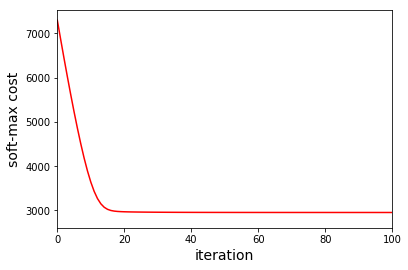

7295.935807764299
2832.169837248108
[[-1.96859155e-02]
 [ 4.93763520e+00]
 [ 1.17357946e-01]
 [ 8.07023940e-03]
 [ 3.60884792e-03]]


In [12]:
number_of_features = 4
w_init = np.zeros(shape=(number_of_features+1,1))
w_init[0] = 0 # expect b to be 0
w_init[1] =  0  # RPI weight
w_init[2] = 1 # Scoring Margin weight - guess that scoring margin is only important feature
w_init[3] = 0 # FTP weight
w_init[4] = 0 # APG weight

w,g2 = gradient_descent(X, y,w_init)

plt.plot(g2,color='r')
plt.xlim(0,100)
plt.xlabel('iteration',fontsize=14)
plt.ylabel('soft-max cost',fontsize=14)
plt.show()
print(g2[0])
print(g2[-1])
print(w[-1])

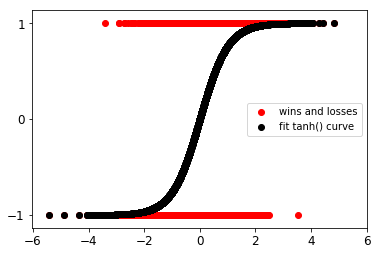

In [13]:
# best fit model parameters
b = -1.96859155e-02
w1 = 4.93763520
w2 = 1.17357946e-01
w3 = 8.07023940e-03
w4 = 3.60884792e-03
plt.scatter(b + w1*x1 + w2*x2 + w3*x3 + w4*x4,y,color='r',label='wins and losses')
plt.scatter(b + w1*x1 + w2*x2 + w3*x3 + w4*x4,np.tanh(b + w1*x1 + w2*x2 + w3*x3 + w4*x4),color='k',label='fit tanh() curve')
plt.yticks([-1,0,1],fontsize=12)
plt.xticks([-6,-4,-2,0,2,4,6],fontsize=12)
plt.legend()
plt.show()

# MSE linear regression

Text(0.5,0,'Assists per game')

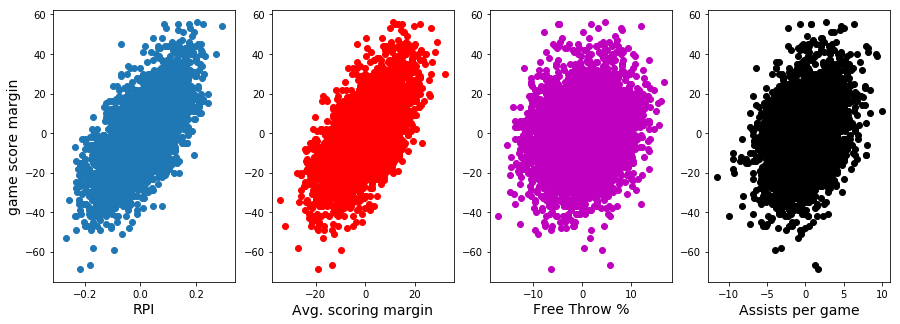

In [14]:
y = gd['yr'].values # get regression values
y.shape = (number_of_games,1)

fig = plt.figure(figsize = (15,5))
plt.subplot(1,4,1)
plt.scatter(x1,y)
plt.ylabel('game score margin',fontsize=14)
plt.xlabel('RPI',fontsize = 14)
plt.subplot(1,4,2)
plt.scatter(x2,y,color='r')
plt.xlabel('Avg. scoring margin',fontsize = 14)
plt.subplot(1,4,3)
plt.scatter(x3,y,color='m')
plt.xlabel('Free Throw %',fontsize = 14)
plt.subplot(1,4,4)
plt.scatter(x4,y,color='k')
plt.xlabel('Assists per game',fontsize = 14)

In [15]:
def gradient_descent(X,y,w0):
    w_path = []                 # container for weights learned at each iteration
    cost_path = []              # container for associated objective values at each iteration
    w_path.append(w0)
    cost = compute_cost_linreg(w0)
    cost_path.append(cost)
    w = w0
    # start gradient descent loop
    max_its = 6000
    alpha = 1e-4
    for k in range(max_its):
        grad = np.dot(X.T,r_linreg(w))
        # take gradient step
        w = w - alpha*grad
        # update path containers
        w_path.append(w)
        cost = compute_cost_linreg(w)
        cost_path.append(cost)


    return w_path,cost_path

# routines for linear regression
def r_linreg(w):
    r = 2*(np.dot(X,w) - y)
    return r
def compute_cost_linreg(w):
    sqrs = np.square((np.dot(X,w) - y))
    g = np.sum(sqrs)
    return g

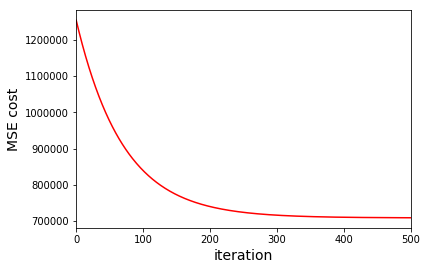

1254042.0
708865.0572323787
11.462677132745233
[[-9.87993603e-02]
 [ 1.23702854e+02]]


In [16]:
number_of_features = 1
w_init = np.zeros(shape=(number_of_features+1,1))
w_init[0] = 0 # expect b to be 0
w_init[1] =  0  # RPI weight

X = np.concatenate((np.ones(shape=(number_of_games,1)),x1),axis=1)

w,g = gradient_descent(X,y,w_init)

plt.plot(g,color='r')
plt.xlim(0,500)
plt.xlabel('iteration',fontsize=14)
plt.ylabel('MSE cost',fontsize=14)
plt.show()
print(g[0])
print(g[-1])
print(np.sqrt(g[-1] / len(y)))
print(w[-1])

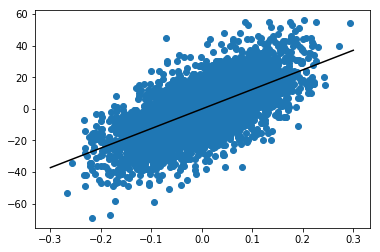

In [17]:
t = np.linspace(-0.3,0.3,len(y))
plt.scatter(x1,y)
plt.plot(t,-9.87993603e-02 + 1.23702854e+02*t,'k')
plt.show()

# Collect Test Data (2017 Tournament) 

In [18]:
test_gd = pd.read_csv('tourney_games.csv')
test_gd.head()

,team A,team B,y,yr
0,Villanova,Mt. St. Mary's,1,20
1,Virginia Tech,Wisconsin,-1,-10
2,UNCW,Virginia,-1,-5
3,Florida,ETSU,1,15
4,SMU,Southern California,-1,-1


In [19]:
number_of_tourney_games = len(test_gd.index)
x1 = np.zeros(shape=(number_of_tourney_games,1))
y = test_gd['y'].values
year = 2017.0

for p in range(number_of_tourney_games):
    teamA = (test_gd.iloc[p])['team A'].strip()
    teamB = (test_gd.iloc[p])['team B'].strip()

    x_A = ((oo.loc[oo['RPI team'].str.rstrip() == teamA])['RPI']).values[0]
    x_B = ((oo.loc[oo['RPI team'].str.rstrip() == teamB])['RPI']).values[0]
    x1[p] = (x_A - x_B)

In [20]:
x2 = np.zeros(shape=(number_of_tourney_games,1))
for p in range(number_of_tourney_games):
    teamA = (test_gd.iloc[p])['team A'].strip()
    teamB = (test_gd.iloc[p])['team B'].strip()

    x_A = ((oo.loc[oo['SCMG team'].str.rstrip() == teamA])['SCMG']).values[0]
    x_B = ((oo.loc[oo['SCMG team'].str.rstrip() == teamB])['SCMG']).values[0]
    x2[p] = (x_A - x_B)

In [21]:
x3 = np.zeros(shape=(number_of_tourney_games,1))
for p in range(number_of_tourney_games):
    teamA = (test_gd.iloc[p])['team A'].strip()
    teamB = (test_gd.iloc[p])['team B'].strip()

    x_A = ((oo.loc[oo['FTP team'].str.rstrip() == teamA])['FTP']).values[0]
    x_B = ((oo.loc[oo['FTP team'].str.rstrip() == teamB])['FTP']).values[0]
    x3[p] = (x_A - x_B)

In [22]:
x4 = np.zeros(shape=(number_of_tourney_games,1))
for p in range(number_of_tourney_games):
    teamA = (test_gd.iloc[p])['team A'].strip()
    teamB = (test_gd.iloc[p])['team B'].strip()

    x_A = ((oo.loc[oo['APG team'].str.rstrip() == teamA])['APG']).values[0]
    x_B = ((oo.loc[oo['APG team'].str.rstrip() == teamB])['APG']).values[0]
    x4[p] = (x_A - x_B)

# Calculate number of missclassifications in test 

In [23]:
b = -1.96859155e-02
w1 = 4.93763520
w2 = 1.17357946e-01
w3 = 8.07023940e-03
w4 = 3.60884792e-03

number_of_round1_games = 32
y.shape = (number_of_tourney_games,1)
y_expect = np.zeros(shape=(number_of_tourney_games,1))
miss_classifications = 0
for p in range(number_of_round1_games):
    classifier = b + w1*x1[p] + w2*x2[p] + w3*x3[p] + w4*x4[p]
    if classifier > 0:
        y_expect[p] = 1
    else:
        y_expect[p] = -1
    if y_expect[p] != y[p]:
        miss_classifications += 1
        
success_percentage = (1 - (miss_classifications/number_of_round1_games))*100

print('predicted {}% of 1st round games correctly'.format(success_percentage))
Y = np.concatenate((y,y_expect),axis=1)

predicted 84.375% of 1st round games correctly


# Compare actual scores to predicted score (from RPI regression)

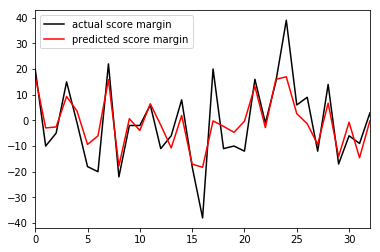

In [24]:
b = -9.87993603e-02
w1 = 1.23702854e+02

number_of_round1_games = 32
y = test_gd['yr'].values
y.shape = (number_of_tourney_games,1)
y_expect = np.zeros(shape=(number_of_tourney_games,1))

for p in range(number_of_round1_games):
    score_margin_prediction = b + w1*x1[p]
    y_expect[p] = score_margin_prediction
# success_percentage = (1 - (miss_classifications/number_of_round1_games))*100 
# print('predicted {}% of 1st round games correctly'.format(success_percentage))
Y = np.concatenate((y,y_expect),axis=1)
plt.plot(y,label='actual score margin',color='k')
plt.plot(y_expect,label='predicted score margin',color='r')
plt.xlim(0,32)
plt.legend()
plt.show()